https://www.kaggle.com/datasets/subirmaity/mosfet-characteristics/data


https://www.infineon.com/dgdl/Infineon-CoolSiC_MOSFET_1200V-SiC_trench_power_device-ApplicationNotes-v01_02-EN.pdf?fileId=5546d462617643590161c27fbcda0aae

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
# plt.style.use('default')
import numpy as np

In [70]:
df = pd.read_csv('training_data.csv')

In [71]:
print(df.head())
print(df.describe())
print("\nVGS Bins:", len(df["Vgs"].unique()))
print("\nVGS Bins:", df["Vgs"].unique())


    Vds  Vgs            Id
0  0.00  0.0  0.000000e+00
1  0.02  0.0  2.770000e-14
2  0.04  0.0  4.790000e-14
3  0.06  0.0  6.900000e-14
4  0.08  0.0  8.950000e-14
                Vds           Vgs            Id
count  25351.000000  25351.000000  2.535100e+04
mean       2.500000      2.500000  2.980175e-05
std        1.449166      1.457767  4.035671e-05
min        0.000000      0.000000  0.000000e+00
25%        1.240000      1.250000  3.990000e-12
50%        2.500000      2.500000  5.650000e-06
75%        3.760000      3.750000  5.270000e-05
max        5.000000      5.000000  1.440000e-04

VGS Bins: 101

VGS Bins: [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05
 2.1  2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75
 2.8  2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35 3.4  3.45
 3.5  3.55 3.6  3.65 3.7 

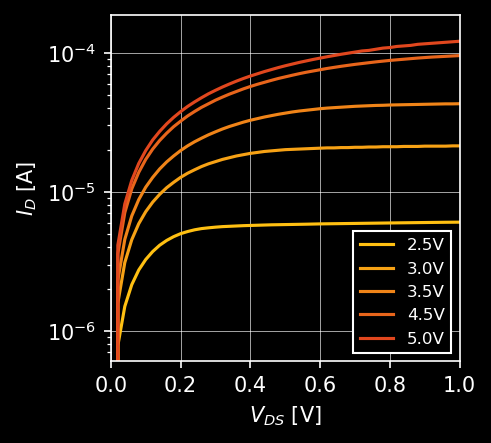

In [249]:
vgs = [2.5, 3.0, 3.5, 4.5, 5.0]
colours = ["FFC012", "F7A215", "F08418", "E8651B", "E1471E",]

if len(vgs) == len(colours):
    fig, ax = plt.subplots(1, 1, figsize=(3, 3), sharex=True, sharey=True, dpi=150)
    for v, c in zip(vgs, colours):
        dt = df[df["Vgs"] == v]
        ax.plot(dt["Vds"], dt["Id"], label=f"{v}V", color=f"#{c}",linewidth=1.5)

    ax.set_xlabel("$V_{DS}$ [V]")
    ax.set_ylabel("$I_{D}$ [A]")

    ax.set_yscale('log', base=10)
    ax.set_xlim(0.0, 1.0)
    ax.legend(loc="best", fontsize=8, fancybox=False, framealpha=1.0, edgecolor="1.0")
    ax.grid(linewidth=.3)
else:
    print("check your lists")

In [171]:
df['Rds'] = df['Vds'] / df ['Id']
df.fillna(0, inplace=True)
df.head()

,Vds,Vgs,Id,Rds
0,0.00,0.0,0.000000e+00,0.000000e+00
1,0.02,0.0,2.770000e-14,7.220217e+11
2,0.04,0.0,4.790000e-14,8.350731e+11
3,0.06,0.0,6.900000e-14,8.695652e+11
4,0.08,0.0,8.950000e-14,8.938547e+11


In [178]:
df1 = df.groupby("Vgs", as_index=False)["Rds"].mean()
df1.head()

,Vgs,Rds
0,0.00,9.855113e+11
1,0.05,9.855113e+11
2,0.10,9.855113e+11
3,0.15,9.855113e+11
4,0.20,9.855113e+11


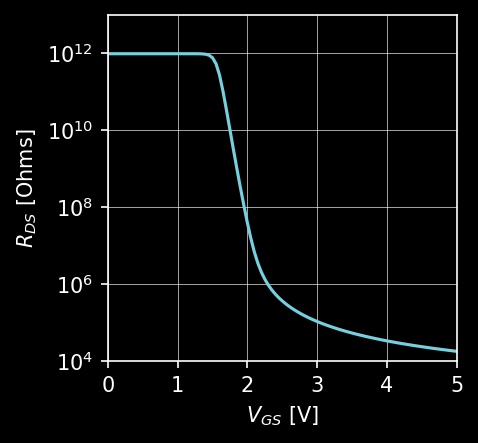

In [226]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3), sharex=True, sharey=True, dpi=150)

ax.plot(df1["Vgs"], df1["Rds"], color=f"#{"78CFDE"}",linewidth=1.5)


ax.set_xlabel("$V_{GS}$ [V]")
ax.set_ylabel("$R_{DS}$ [Ohms]")

ax.set_yscale('log', base=10)
ax.set_xlim(0.0, 5.0)
ax.set_ylim(1E+4, 1E+13)
# ax.legend(loc="best", fontsize=8, fancybox=False, framealpha=1.0, edgecolor="1.0")
ax.grid(linewidth=.3)

In [230]:
df2 = df.groupby("Vgs", as_index=False)["Id"].mean()
df2.head()

,Vgs,Id
0,0.00,2.509937e-12
1,0.05,2.509937e-12
2,0.10,2.509937e-12
3,0.15,2.509937e-12
4,0.20,2.509937e-12


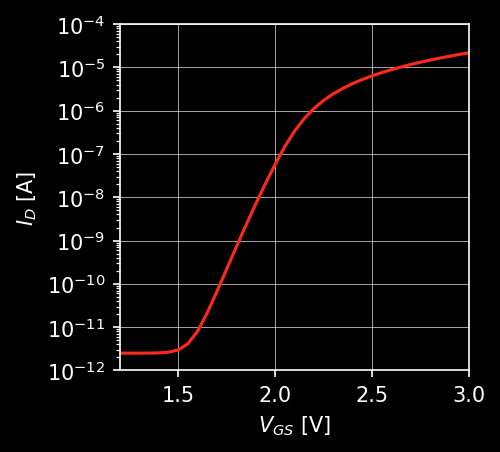

In [250]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3), sharex=True, sharey=True, dpi=150)

ax.plot(df2["Vgs"], df2["Id"], color=f"#{"fb291b"}",linewidth=1.5)


ax.set_xlabel("$V_{GS}$ [V]")
ax.set_ylabel("$I_{D}$ [A]")

ax.set_yscale('log', base=10)
ax.set_xlim(1.2, 3.0)
ax.set_ylim(1E-12, 1E-4)
# ax.legend(loc="best", fontsize=8, fancybox=False, framealpha=1.0, edgecolor="1.0")
ax.grid(linewidth=.3)